### Задача.

Подберите собственную базу изображений и разделите ее на классы для классификации. Подберите
архитектуру сверточной нейронной сети и добейтесь точности классификации данных Вашей базы
не менее 85% на проверочной выборке.

In [0]:
# Сергей в ватсапе подтвердил, что можно взять базу с google datasets search
# cначала возникла идея, а потом нашлась база)
# мы попробуем научить нейронку распознавать жесты глухонемых
# как вариант можно было бы внедрить эту нейронку в какой-нибудь Ардуино для практического применения

In [0]:
# https://www.kaggle.com/datamunge/sign-language-mnist

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras import utils
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:
from google.colab import files
train = files.upload()

Saving sign_mnist_train.csv to sign_mnist_train.csv


In [0]:
test = files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv


In [0]:
!ls

sample_data  sign_mnist_test.csv  sign_mnist_train.csv


In [0]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [0]:
test_x = test.drop('label', axis=1)
train_x = train.drop('label', axis=1)
test_y = test.label
train_y = train.label

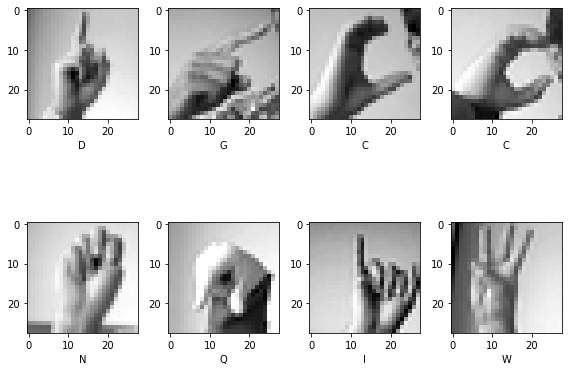

In [0]:
f, ax = plt.subplots(2,4)
f.set_size_inches(8,8)

k = 0
for i in range(2):
    for j in range(4):
        img = train_x.iloc[k].to_numpy()
        img = img.reshape((28,28))
        ax[i,j].set_xlabel(chr(train_y[k] + 65))
        ax[i,j].imshow(img,cmap='gray')
        k += 1
    plt.tight_layout()

In [0]:
# reshape
X_train = train_x/255.0
X_test = test_x/255.0
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (27455, 28, 28, 1)
X_test shape:  (7172, 28, 28, 1)


In [0]:
train_y

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [0]:
from sklearn.preprocessing import LabelBinarizer
Y_train = LabelBinarizer().fit_transform(train_y)
Y_test = LabelBinarizer().fit_transform(test_y)

Epoch 1/45
215/215 [==============================] - 4s 18ms/step - loss: 0.4720 - accuracy: 0.8610 - val_loss: 0.4679 - val_accuracy: 0.8769
Epoch 2/45
215/215 [==============================] - 3s 15ms/step - loss: 0.0186 - accuracy: 0.9954 - val_loss: 0.4402 - val_accuracy: 0.9053
Epoch 3/45
215/215 [==============================] - 3s 15ms/step - loss: 0.0091 - accuracy: 0.9975 - val_loss: 0.5580 - val_accuracy: 0.9080
Epoch 4/45
215/215 [==============================] - 3s 15ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 0.5777 - val_accuracy: 0.9025
Epoch 5/45
215/215 [==============================] - 3s 15ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.6116 - val_accuracy: 0.8949
Epoch 6/45
215/215 [==============================] - 3s 15ms/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.7079 - val_accuracy: 0.8993
Epoch 7/45
215/215 [==============================] - 3s 15ms/step - loss: 0.0065 - accuracy: 0.9983 - val_loss: 0.6022 - val_accuracy: 0.9158

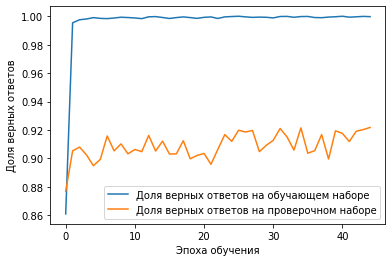

In [0]:
batch_size = 128
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(24, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, 
                    Y_train, 
                    batch_size=batch_size, 
                    epochs=45,
                    validation_data=(X_test, Y_test),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
model.save('my_model.h5')

In [0]:
files.download('my_model.h5')